# Confusion Matrix and Sentiment Analysis


## Lending Club Dataset

The following code processes the *Lending Club Dataset* from [kaggle](https://www.kaggle.com/datasets/mariiagusarova/preprocessed-lending-club-dataset-v2).

__Run and comment the following instructions (fix them if needed). Inspect he dataframe?__

In [1]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn
import numpy as np

/tmp/ipykernel_7230/3363083914.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
# import dataset
loan = pd.read_csv('loans.csv', low_memory=True)

In [4]:
loan

,loan_amnt,term,sub_grade,emp_length,annual_inc,loan_status,dti,mths_since_recent_inq,revol_util,num_op_rev_tl,...,addr_state__SD,addr_state__TN,addr_state__TX,addr_state__UT,addr_state__VA,addr_state__VT,addr_state__WA,addr_state__WI,addr_state__WV,addr_state__WY
0,3600.0,1.0,24.0,10.0,55000.0,0.0,5.91,4.0,29.7,4.0,...,0,0,0,0,0,0,0,0,0,0
1,20000.0,2.0,14.0,10.0,63000.0,0.0,10.78,10.0,56.2,4.0,...,0,0,0,0,0,0,0,0,0,0
2,10400.0,2.0,51.0,3.0,104433.0,0.0,25.37,1.0,64.5,7.0,...,0,0,0,0,0,0,0,0,0,0
3,20000.0,1.0,11.0,10.0,85000.0,0.0,17.61,8.0,5.7,3.0,...,0,0,0,0,0,0,0,0,0,0
4,10000.0,1.0,2.0,6.0,85000.0,0.0,13.07,1.0,34.5,13.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848449,22400.0,2.0,22.0,10.0,119000.0,1.0,23.22,1.0,51.5,12.0,...,0,0,0,0,0,1,0,0,0,0
848450,19400.0,2.0,24.0,0.0,78000.0,0.0,13.02,2.0,63.8,9.0,...,0,0,0,0,0,0,0,0,0,0
848451,11200.0,2.0,22.0,5.0,86000.0,1.0,4.80,10.0,54.7,7.0,...,0,0,0,0,0,0,1,0,0,0
848452,23800.0,2.0,24.0,10.0,119000.0,0.0,32.73,0.0,89.5,8.0,...,0,0,0,0,0,0,0,0,0,0


__Run and comment the following instructions (fix them if needed). What kind of modeling exercise is performed?__

In [5]:
loan['loan_status'].value_counts()

loan_status
0.0    672377
1.0    176077
Name: count, dtype: int64

The objective here is to build a model to predict which loans will default (loan_status=1). It is a classification exercise.
 Since the number of regressors is fairly large it is natural to look for a machine learning approcah.


In [7]:
#  create a list of all regressors (excluding loan_status)
features = loan.columns.to_list()
features.remove('loan_status')
features

['loan_amnt',
 'term',
 'sub_grade',
 'emp_length',
 'annual_inc',
 'dti',
 'mths_since_recent_inq',
 'revol_util',
 'num_op_rev_tl',
 'home_ownership__ANY',
 'home_ownership__MORTGAGE',
 'home_ownership__NONE',
 'home_ownership__OTHER',
 'home_ownership__OWN',
 'home_ownership__RENT',
 'addr_state__AK',
 'addr_state__AL',
 'addr_state__AR',
 'addr_state__AZ',
 'addr_state__CA',
 'addr_state__CO',
 'addr_state__CT',
 'addr_state__DC',
 'addr_state__DE',
 'addr_state__FL',
 'addr_state__GA',
 'addr_state__HI',
 'addr_state__ID',
 'addr_state__IL',
 'addr_state__IN',
 'addr_state__KS',
 'addr_state__KY',
 'addr_state__LA',
 'addr_state__MA',
 'addr_state__MD',
 'addr_state__ME',
 'addr_state__MI',
 'addr_state__MN',
 'addr_state__MO',
 'addr_state__MS',
 'addr_state__MT',
 'addr_state__NC',
 'addr_state__ND',
 'addr_state__NE',
 'addr_state__NH',
 'addr_state__NJ',
 'addr_state__NM',
 'addr_state__NV',
 'addr_state__NY',
 'addr_state__OH',
 'addr_state__OK',
 'addr_state__OR',
 'addr_sta

In [9]:
# split dataset into training and test set
# 25% looks a bit big given the abundance of data
# use a random state to make results replicable
df_train, df_test = train_test_split(loan, test_size=0.25, random_state=42)


In [10]:
# we choose a classification model (logistic regression)
clf = LogisticRegression()

clf.fit(df_train[features], df_train['loan_status'])

/home/pablo/.local/opt/micromamba/envs/escp/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
# make prediction on the test set
y_pred = clf.predict(df_test[features])

# compute the score of the fitted model on the test set
print(
    'Accuracy of logistic regression classifier on test set: {:.2f}'.format(
        clf.score(df_test[features], df_test['loan_status'])
    )
)

Accuracy of logistic regression classifier on test set: 0.79


In [13]:
# compute the confusion matrix
cal = sklearn.metrics.confusion_matrix(df_test['loan_status'], y_pred, labels=clf.classes_)
print(cal)

[[165146   2918]
 [ 41439   2611]]


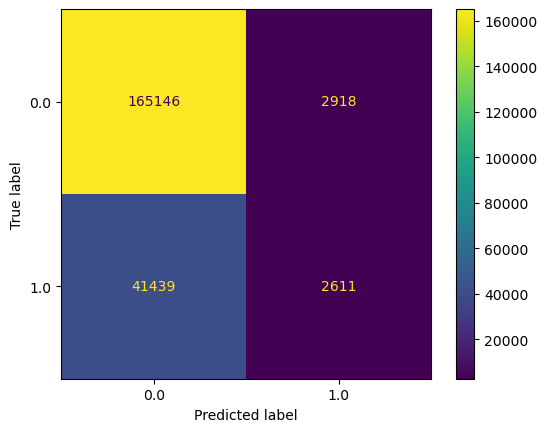

In [63]:
#
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cal, display_labels=clf.classes_)
disp.plot()

__For the confusion matrix that was just computed compute accuracy, precision, recall and f1 score (lookup the definitions if needed).__

In [15]:
# compute the different statistics (by hand or programmatically)

recall = cal[1,1] / (cal[1,0] + cal[1,1])
recall

0.05927355278093076

__Comment on the model validity__.

The model fails to detect 95% of non-performing loans. It is very inefficient.

## The Dataset

We use the [News Sentiment Dataset](https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset) from Kaggle.

1. __Import Dataset as a pandas dataframe. Remove rows where `selected_text` is not available.__

In [94]:
# the following command checks the current working directory 
# it should end with session_8
%pwd

'/home/pablo/Teaching/escp/dbe/tutorials/session_8'

In [17]:
import pandas
df = pandas.read_csv("Tweets.csv")

In [20]:
df.head(5)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will 🦈 miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


2. __Describe Dataset (text and graphs). What is the distribution of the various sentiment values?__

In [24]:
df['sentiment'].value_counts() / len(df['sentiment'])

sentiment
neutral     0.404570
positive    0.312288
negative    0.283141
Name: count, dtype: float64

The sentiments are rather balanced (30% positive, 30% negative)

In [ ]:
import seaborn as sns

<Axes: xlabel='sentiment', ylabel='Count'>

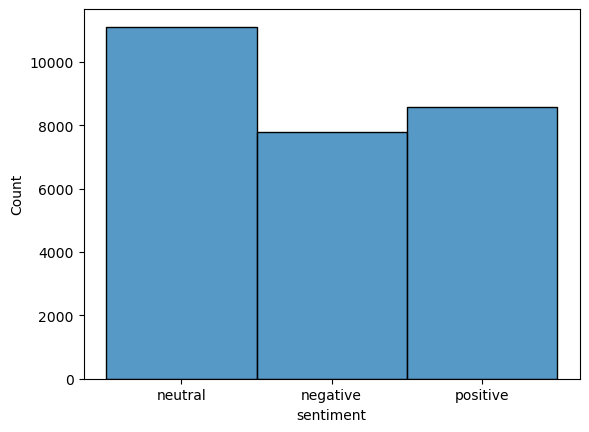

In [27]:
sns.histplot(df['sentiment'])

4. __Count the number of tweets mentioning `trump`__.

In [35]:
# count number of non-available values
sum( df['selected_text'].isna() )

1

In [37]:
# remove na (~ is negation)
df = df[~ df['selected_text'].isna()]

In [43]:
sum( df['selected_text'].str.count('trump') )

2

5. __Split Dataset into training, and test set.__

In [45]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=123)

In [49]:
df_train

,textID,text,selected_text,sentiment
24126,52a34843de,"Zeb has napped for 6 hours already today, and ...",he must be growing fast,positive
8513,f1049a3c9c,"good stuff, cant wait for the results","good stuff,",positive
10881,2cc253edc6,I have the best bestfriend in the whole world...,best,positive
10826,e1a023ed94,not good you`re not comin close to where i lo...,not good you`re not comin close to where i lov...,neutral
7852,d442dd8d79,Maybe until Wednesday?,Maybe until Wednesday?,neutral
...,...,...,...,...
15378,cfbec13b5d,"_dam haha, that would be cool. brianna and i s...","haha, that would be cool.",positive
21603,dc582b9f85,YAY!! that`s so cool aww that woulda been sw...,! I`m just glad,positive
17731,1d36d815e9,i knoww she is da best!,a best,positive
15726,a0d6b5cd94,**** the day flies when u got 3647 things to d...,**** the day flies when u got 3647 things to d...,negative


## Classifying tweets

The goal is now to to build a tweet classifier to predict a tweet sentiment, without any human input.

1. __Extract features from the training dataset. What do you do with non-words / punctuation?__

(hint: check the CountVectorizer function and the [tutorial](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html) on sklearn webpage.)

In [50]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train = count_vect.fit_transform(df_train['selected_text'])

In [51]:
X_train

<20610x14807 sparse matrix of type '<class 'numpy.int64'>'
	with 129423 stored elements in Compressed Sparse Row format>

2. __Convert occurrencies to frequencies. Make another version with tf-idf.__

In [54]:
# compute simple frequencies
# from sklearn.feature_extraction.text import TfidfTransformer
# tf_transformer = TfidfTransformer(use_idf=False).fit(X_train)
# X_train_tf = tf_transformer.transform(X_train)
# X_train_tf.shape

In [53]:
# weight counts by inverse frequencies
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=True).fit(X_train)
X_train_tf = tf_transformer.transform(X_train)
X_train_tf.shape

(20610, 14807)

3. __Choose a classifier to predict the sentiment on the *validation* set. Compute the confusion matrix.__

In [55]:
# note that we are using `transform`, not `fit_transform` as we are not recomputing the f
X_test = count_vect.transform(df_test['selected_text'])
X_itf_test = tf_transformer.transform(X_test)

In [56]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tf,df_train['sentiment'])

In [58]:
prediction = clf.predict(X_itf_test)

In [59]:
# compare prediction to actual sentiment

In [61]:
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(prediction, df_test['sentiment'])
mat

array([[1112,   50,   37],
       [ 752, 2687,  533],
       [  71,   48, 1580]])

In [63]:
accuracy = (mat[0,0] + mat[1,1] +mat[2,2]) / mat.sum()
accuracy

0.7829694323144105